# NLP Group 1 Project
- Saroj Duwal

In [2]:
import pandas as pd
import numpy as np
import unicodedata
import string
import time
import random
from bs4 import BeautifulSoup
from requests import get
import re
import os
import json
import csv
import requests
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
# import acquire
import prepare
import env

# Data Acquisition
- I used the acquire.py module for the data acquisition.
- for the uniformatity I used Josh's csv file for the convienience as the acquiring process longer time.

In [3]:
# read the csv file
df= pd.read_csv('data.csv')

In [4]:
df.head()

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...
1,996icu/996.ICU,NaN,[996.ICU](https://996.icu/#/en_US)\n=======\n*...
2,EbookFoundation/free-programming-books,NaN,# List of Free Learning Resources In Many Lang...
3,jwasham/coding-interview-university,NaN,# Coding Interview University\n\n> I originall...
4,kamranahmedse/developer-roadmap,TypeScript,"<p align=""center"">\n <img src=""public/brand.p..."


In [ ]:
# shape of the dataframe
df.shape

In [7]:
# count the nulls
df.isnull().sum()

repo                 0
language           114
readme_contents      4
dtype: int64

In [8]:
#  null language be labeled "English"
df.language = df.language.fillna('English')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1031 non-null   object
 1   language         1031 non-null   object
 2   readme_contents  1027 non-null   object
dtypes: object(3)
memory usage: 24.3+ KB


In [10]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1031 non-null   object
 1   language         1031 non-null   object
 2   readme_contents  1027 non-null   object
dtypes: object(3)
memory usage: 24.3+ KB


In [11]:
# Dropping 4 null from the readme_contents
df = df.dropna()

In [12]:
#making sutre no nulls present in dataframe
df.isnull().sum()

repo               0
language           0
readme_contents    0
dtype: int64

In [13]:
df['language'].value_counts()


JavaScript          232
Python              114
English             114
TypeScript          109
Go                   76
Java                 70
C++                  55
C                    30
HTML                 23
Shell                22
Rust                 21
Swift                18
Ruby                 18
Jupyter Notebook     14
PHP                  14
C#                   13
Kotlin               12
CSS                  12
Vue                   8
Objective-C           5
Lua                   4
Dart                  4
Vim script            3
Haskell               3
Markdown              3
SCSS                  3
TeX                   3
Elixir                2
Vim Script            2
Clojure               2
Makefile              2
Zig                   1
Emacs Lisp            1
OCaml                 1
Julia                 1
CoffeeScript          1
Objective-C++         1
AsciiDoc              1
Nunjucks              1
Batchfile             1
Scala                 1
Jinja           

<AxesSubplot:>

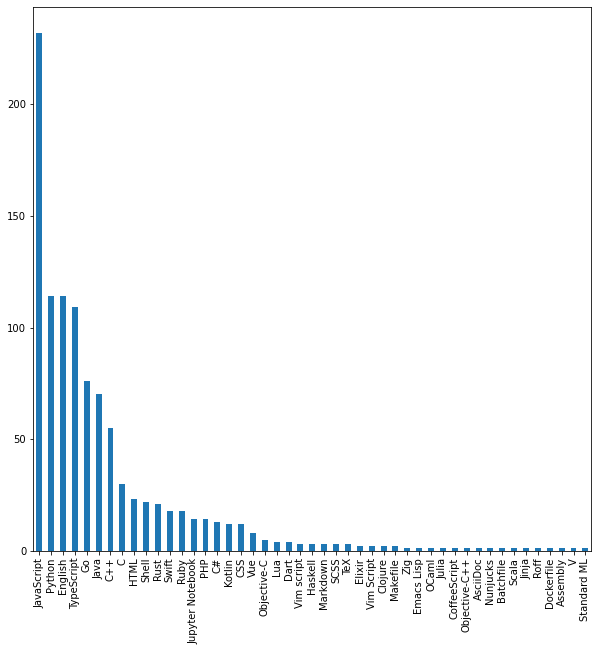

In [14]:
plt.figure(figsize=(10,10))
df.language.value_counts().plot.bar()

# Preparation

###  keeping only the languages that occurs more than 10. ignore the languages that occurs least frequent.


In [15]:
# determining remaining list of languages
languages_shortlisted = df.language.value_counts()[df.language.value_counts() > 10].index

In [16]:
df= df[df.language.isin(languages_shortlisted)]

In [17]:
df.language.value_counts()

JavaScript          232
Python              114
English             114
TypeScript          109
Go                   76
Java                 70
C++                  55
C                    30
HTML                 23
Shell                22
Rust                 21
Ruby                 18
Swift                18
PHP                  14
Jupyter Notebook     14
C#                   13
CSS                  12
Kotlin               12
Name: language, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1030
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             967 non-null    object
 1   language         967 non-null    object
 2   readme_contents  967 non-null    object
dtypes: object(3)
memory usage: 30.2+ KB


In [19]:
# changing to string type
df['readme_contents'] =  df['readme_contents'].astype('string')

In [20]:
df.dtypes


repo               object
language           object
readme_contents    string
dtype: object

#### clean the data using prepare module that includes
- clean
- tokenize
- stemming
- lemmatizing

In [21]:
#  basic cleaning, tokenize and removing stopwords from the  readme_contents column
df['clean']= df['readme_contents'].apply(lambda x: prepare.remove_stopwords(prepare.tokenize(prepare.basic_clean(x))))

In [22]:
# stemming the tokenized column
df['stemmed'] = df['clean'].apply(lambda x: prepare.stem(x))

In [23]:
# lemmatizing the tokenized column
df['lemmatized'] = df['clean'].apply(lambda x: prepare.lemmatize(x))

In [24]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...,freecodecamp social requests source freecodeca...,freecodecamp social request sourc freecodecamp...,freecodecamp social request source freecodecam...
1,996icu/996.ICU,English,[996.ICU](https://996.icu/#/en_US) ======= **P...,note exists official account app merchandise e...,note exist offici account app merchandis excep...,note exists official account app merchandise e...
2,EbookFoundation/free-programming-books,English,# List of Free Learning Resources In Many Lang...,list free learning resources many aligncenter ...,list free learn resourc mani aligncent cc hack...,list free learning resource many aligncenter c...
3,jwasham/coding-interview-university,English,# Coding Interview University > I originally ...,coding interview originally created short todo...,code interview origin creat short todo list st...,coding interview originally created short todo...
4,kamranahmedse/developer-roadmap,TypeScript,"<p align=""center""> <img src=""public/brand.pn...",p img srcpublicbrandpng h2 p aligncentercommun...,p img srcpublicbrandpng h2 p aligncentercommun...,p img srcpublicbrandpng h2 p aligncentercommun...


In [28]:
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

# Exploration

In [ ]:
jscript_words = list(' '.join(df.lemmatized[df.language == 'JavaScript']))
python_words = list(' '.join(df.lemmatized[df.language == 'Python']))
c_words = list(' '.join(df.lemmatized[df.language == 'C']))
typescript_words = list(' '.join(df.lemmatized[df.language == 'TypeScript']))
c_sharp_words = list(' '.join(df.lemmatized[df.language == 'C#']))